Testing the library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import aggregate
import matplotlib.pyplot as plt
import datacube
datacube.config.LocalConfig.db_database = 'wofstest'
datacube.config.LocalConfig.db_hostname = 'agdcstaging-db'
dc = datacube.Datacube()

In [3]:
lon = 143.83756, 143.88605
lat = -30.55194, -30.59073
stack = dc.load(product='wofs_albers', lat=lat, lon=lon)

In [4]:
water, time = aggregate.wofs_ma(stack)

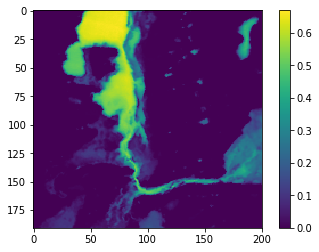

In [5]:
plt.imshow(water.mean(axis=0))
plt.colorbar()
None

In [6]:
#import importlib
#importlib.reload(aggregate)

In [ ]:
plt.plot()

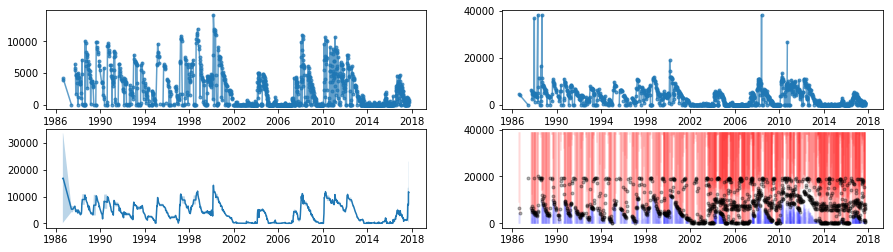

In [14]:
fig, axes = plt.subplots(2,2)
axes = axes.ravel()
aggregate.Naive(stack).plot(axes=axes[0])
aggregate.Broken(stack).plot(axes=axes[1])
aggregate.ConstantBracket(stack).plot(axes=axes[2])
aggregate.NaiveBounds(stack).plot(axes=axes[3])
fig.set_figwidth(15)

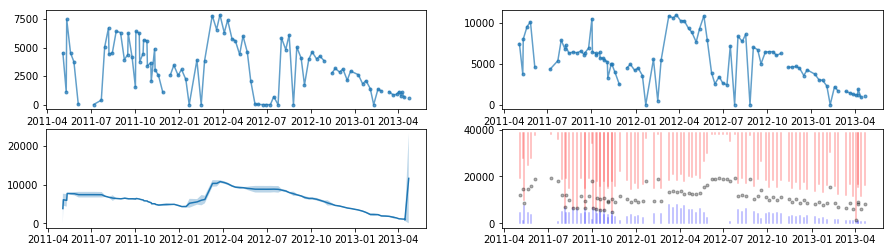

In [23]:
subset = stack.isel(time=slice(1150,1250))

fig, axes = plt.subplots(2,2)
axes = axes.ravel()
aggregate.Naive(subset).plot(axes=axes[0])
aggregate.Broken(subset).plot(axes=axes[1])
aggregate.ConstantBracket(subset).plot(axes=axes[2])
aggregate.NaiveBounds(subset).plot(axes=axes[3])
fig.set_figwidth(15)

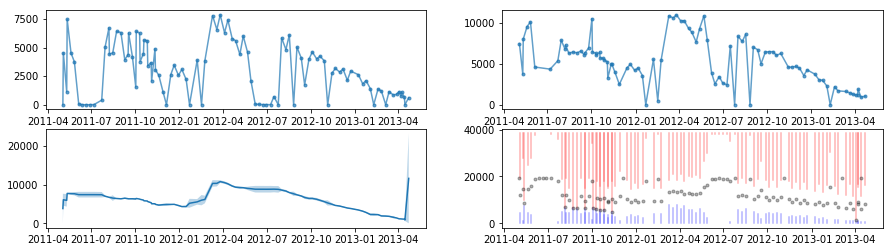

In [37]:
subset = stack.isel(time=slice(1150,1250))

fig, axes = plt.subplots(2,2)
axes = axes.ravel()
aggregate.Naive(subset).plot(axes=axes[0])
aggregate.Broken(subset).plot(axes=axes[1])
aggregate.ConstantBracket(subset).plot(axes=axes[2])
aggregate.NaiveBounds(subset).plot(axes=axes[3])
fig.set_figwidth(15)

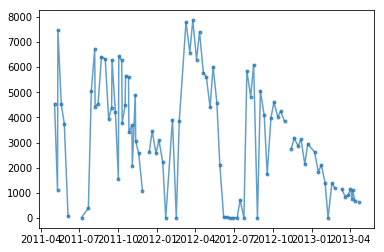

In [32]:
n.plot()

In [34]:
n.bestestimate#.filled(0)

masked_array(data = [-- 4550 1127 7463 4518 3756 67 -- -- -- 14 398 5044 6719 4422 4545 6419
 6318 3945 4389 6275 4197 1545 6425 6268 3777 4477 5656 5605 3402 3687 2074
 4893 3053 2572 1091 -- 2633 3458 2570 3091 2208 0 3908 3 3852 7805 6583
 7867 6303 7410 5780 5610 4400 6013 4588 2112 46 27 8 9 8 708 0 5851 4827
 6102 0 5038 4080 1739 3991 4613 4020 4245 3845 -- 2761 3175 2860 3126 2138
 2941 2628 1834 2109 1398 0 1375 1201 -- 1147 845 917 1154 762 1112 658 --
 619],
             mask = [ True False False False False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False F